The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


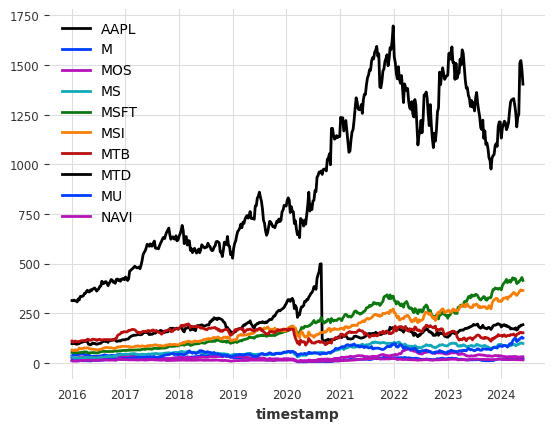

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from darts.timeseries import TimeSeries
from darts.dataprocessing.transformers import Scaler

closes = pd.read_csv('../raw_data/closes.csv', index_col='timestamp', parse_dates=True)
series = TimeSeries.from_dataframe(closes).astype(np.float32)
scaler = Scaler()
train, val = series.split_after(0.8)
train_scaled = scaler.fit_transform(train)
series.plot();

# Linear Regression

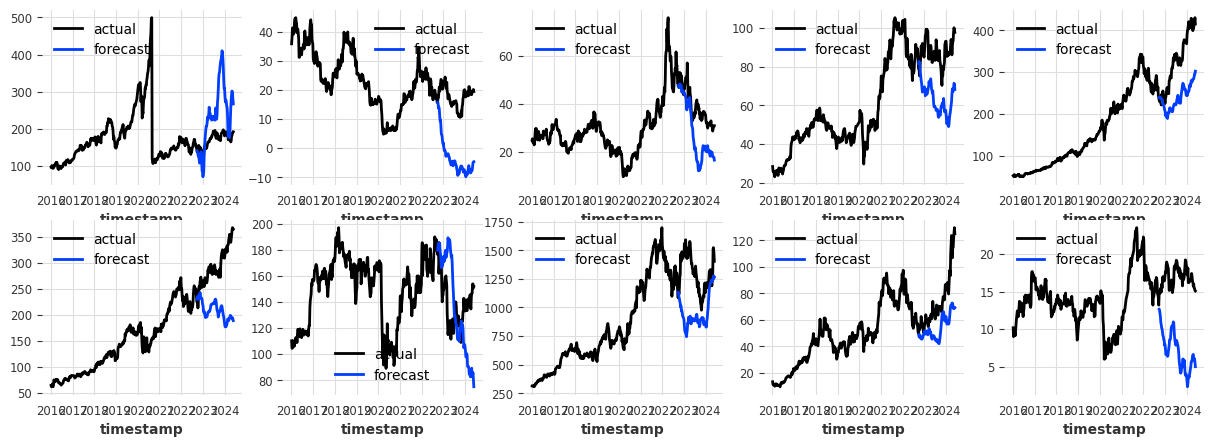

In [13]:
from darts.models import RegressionModel
from sklearn.linear_model import BayesianRidge

model = RegressionModel(lags=100, model=BayesianRidge())

model.fit(
    train_scaled
);

fig, axs = plt.subplots(2, 5, figsize=(15, 5))

for i, ax in enumerate(axs.ravel()):
    pred_series = model.predict(len(val))
    pred_series = scaler.inverse_transform(pred_series)
    series.univariate_component(i).plot(label="actual", ax=ax)
    pred_series.univariate_component(i).plot(label="forecast", ax=ax);